In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [62]:
data=pd.read_csv('advertising.csv')


In [63]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [65]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [66]:
data.shape

(200, 4)

In [67]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

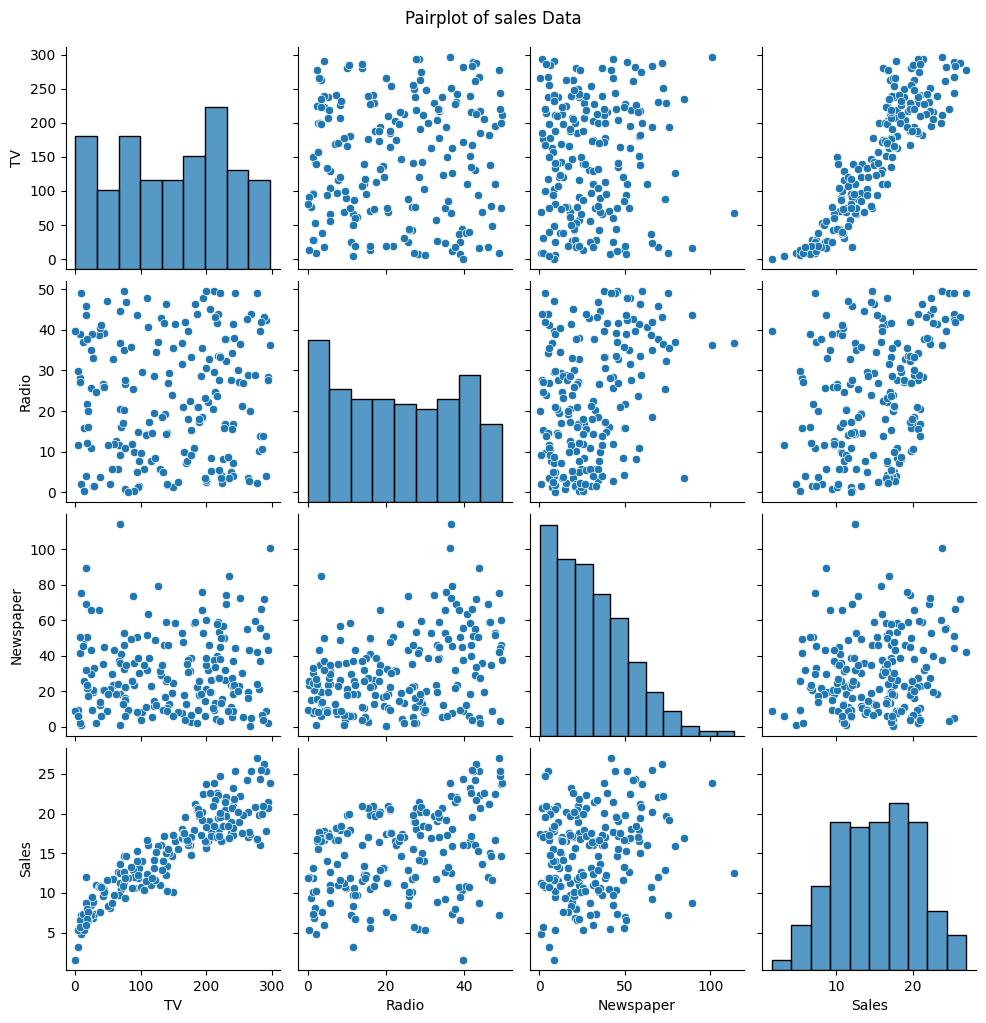

In [68]:
sns.pairplot(data)
plt.suptitle('Pairplot of sales Data',y=1.02)
plt.show()

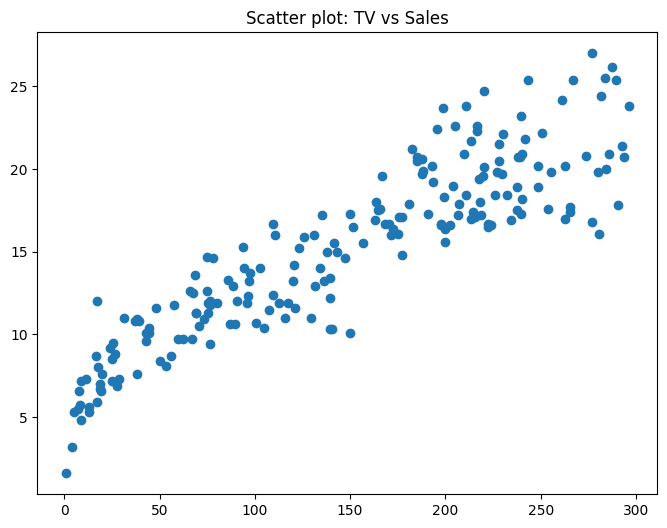

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(x='TV', y='Sales', data=data)
plt.title('Scatter plot: TV vs Sales')
plt.show()

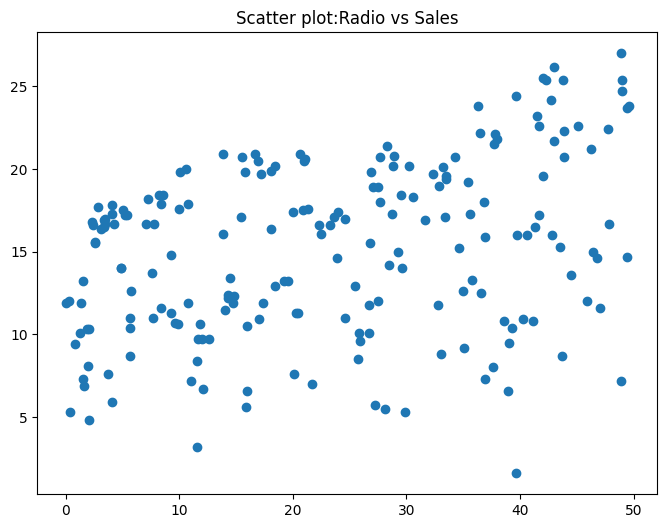

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x='Radio', y='Sales', data=data)
plt.title('Scatter plot:Radio vs Sales')
plt.show()

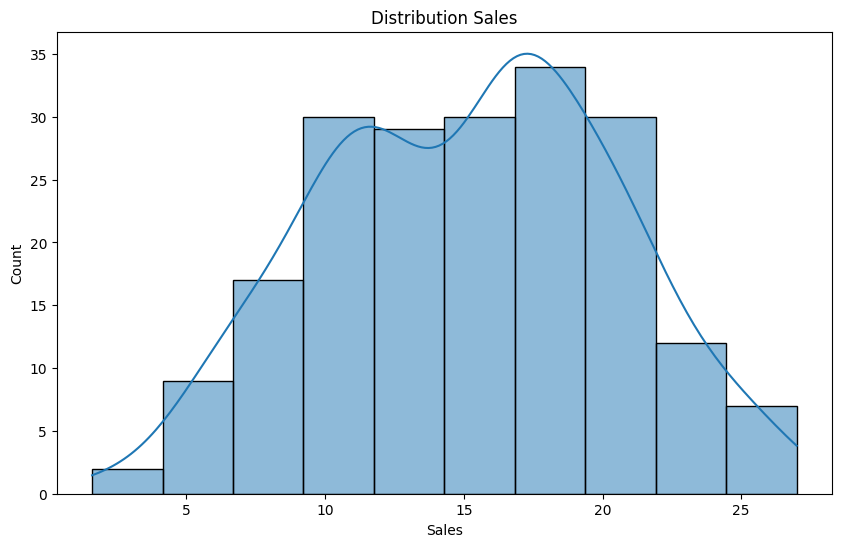

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(data['Sales'],kde=True)
plt.title('Distribution Sales')
plt.show()

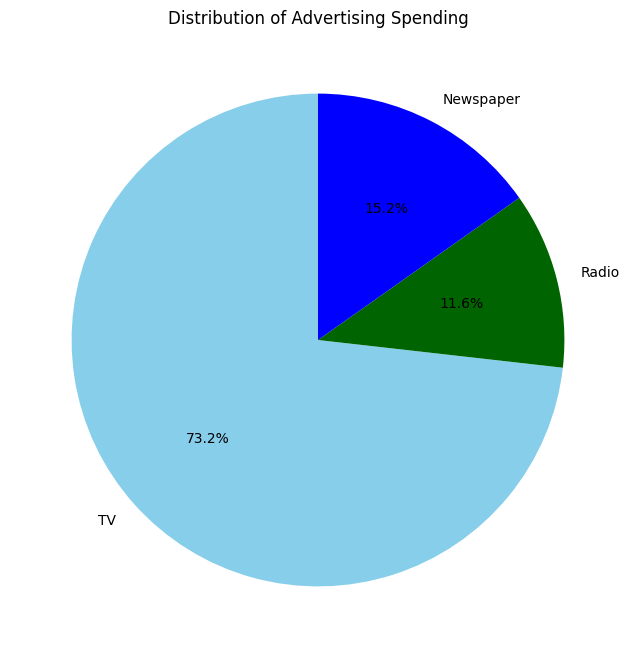

In [72]:
channels=['TV','Radio','Newspaper']
total_spending=[data['TV'].sum(),data['Radio'].sum(),data['Newspaper'].sum()]
plt.figure(figsize=(8,8))
plt.pie(total_spending,labels=channels,autopct='%1.1f%%',startangle=90,colors=['skyblue','darkgreen','blue'])
plt.title('Distribution of Advertising Spending')
plt.show()

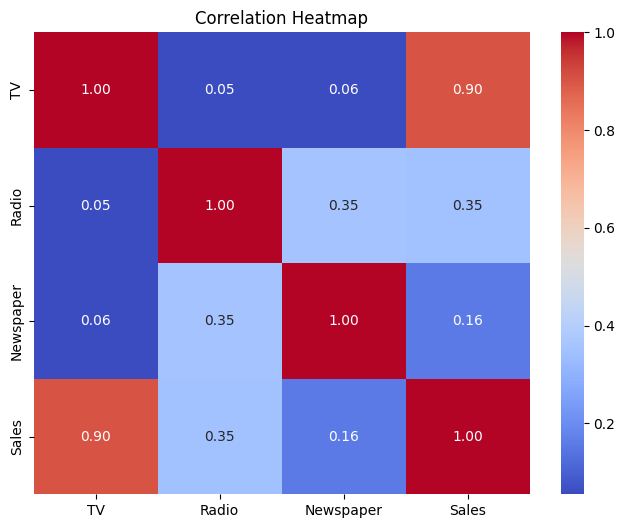

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [74]:
X=data[['TV','Radio','Newspaper']]
Y=data['Sales']

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from tabulate import tabulate


Linear Regression Evaluation:
Mean Squared Error: 2.9077569102710896
R2 Score: 0.9059011844150826


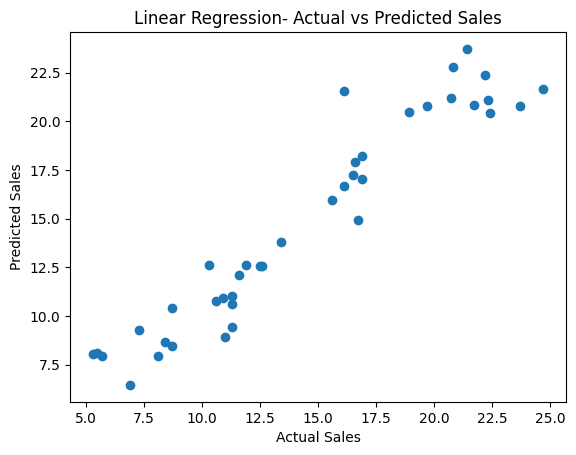


Decision Tree Evaluation:
Mean Squared Error: 2.6727499999999997
R2 Score: 0.9135063153091637


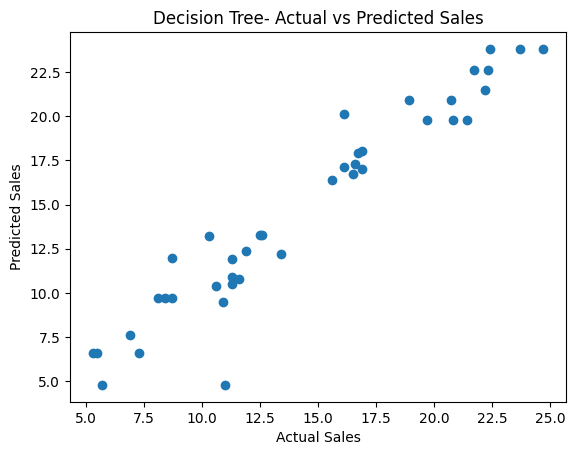


Random Forest Evaluation:
Mean Squared Error: 1.4442993500000025
R2 Score: 0.9532605845746591


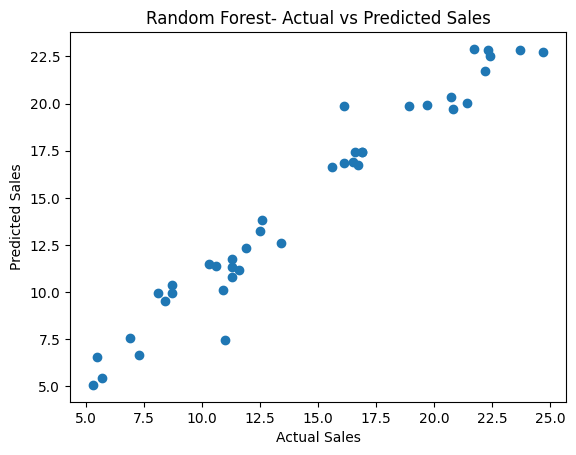


Support Vector Regression Evaluation:
Mean Squared Error: 3.4990871972552546
R2 Score: 0.886764963148391


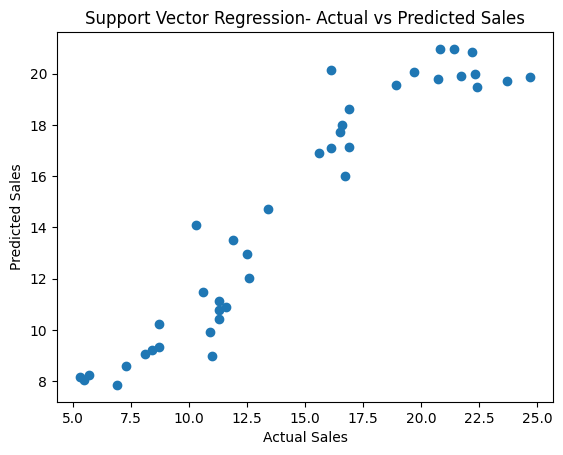

In [77]:
models = {
"Linear Regression": LinearRegression(),
"Decision Tree": DecisionTreeRegressor(),
"Random Forest": RandomForestRegressor(),
"Support Vector Regression": SVR()
}
model_results = []
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    mse =mean_squared_error(Y_test,Y_pred)
    r2 =r2_score(Y_test,Y_pred)
    model_results.append([model_name, mse, r2])
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    plt.scatter(Y_test,Y_pred)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'{model_name}- Actual vs Predicted Sales')
    plt.show()

In [78]:
print("\nModel Comparison")
print(tabulate(model_results,headers=["Model","Mean Squared Error","R2 Score"],tablefmt="grid"))



Model Comparison
+---------------------------+----------------------+------------+
| Model                     |   Mean Squared Error |   R2 Score |
+===========================+======================+============+
| Linear Regression         |              2.90776 |   0.905901 |
+---------------------------+----------------------+------------+
| Decision Tree             |              2.67275 |   0.913506 |
+---------------------------+----------------------+------------+
| Random Forest             |              1.4443  |   0.953261 |
+---------------------------+----------------------+------------+
| Support Vector Regression |              3.49909 |   0.886765 |
+---------------------------+----------------------+------------+
